In [21]:
import pandas as pd 
from scipy import stats
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.stats import linregress

## Generate Continuous Random Dataset for The Problem of Study hours (X) and grade (Y) of students

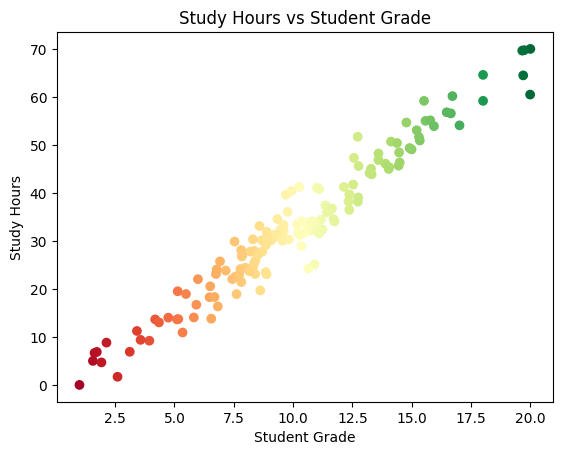

In [22]:
x, y, coef = datasets.make_regression(n_samples=150,n_features=1,noise=20,coef=True , random_state=10) 

x = np.interp(x, (x.min(), x.max()), (1, 20))
y = np.interp(y, (y.min(), y.max()), (0, 70))

plt.scatter(x,y,marker = "o"  , c=x ,  cmap = 'RdYlGn')
plt.xlabel('Student Grade')
plt.ylabel('Study Hours')
plt.title('Study Hours vs Student Grade')
plt.show()

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=50)

## Draw Some Wrong Red lines With a Random Slope.

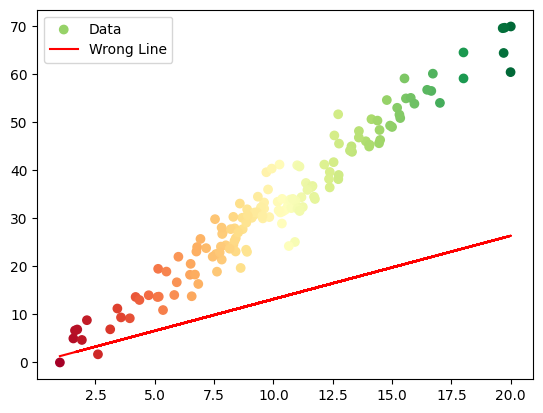

In [24]:
wrong_w  = 1.32
plt.scatter(x , y , c=x , cmap = 'RdYlGn' , label="Data")
plt.plot(x_train , wrong_w * x_train , color="red" , label="Wrong Line")
plt.legend()
plt.show()

## Draw the correct blue line using your Object Oriented Linear Least Squares (LLS) method

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

class LLS :
    def __init__(self) :
        ...
        
    def fit(self , x_train , y_train):
        w = np.matmul(  np.matmul(np.linalg.inv( np.matmul(x_train.T  , x_train) ) , x_train.T ) , y_train )
        return w

    def predict(self , w , x_test): 
        y_pred = x_test * w
        return y_pred

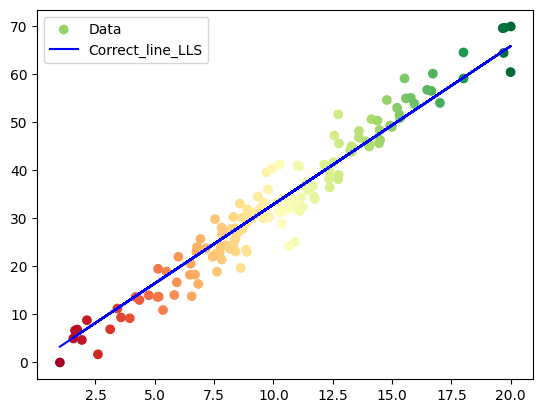

In [26]:

lls = LLS()
w = lls.fit(x_train , y_train)

plt.scatter(x , y , c=x , cmap = 'RdYlGn' , label="Data")
plt.plot(x_train , w * x_train , color="blue" , label="Correct_line_LLS")
plt.legend()
plt.show()

## Draw a green line using linregress from scipy library

In [27]:
x_train_scy = x_train.reshape(-1, 1)
y_train_scy = y_train.reshape(-1, 1)

In [28]:
x_train_scy

array([[12.37286004],
       [10.36436833],
       [ 8.5834057 ],
       [11.10255296],
       [ 9.60765794],
       [ 8.88583734],
       [ 9.19712291],
       [ 7.78466166],
       [17.0139559 ],
       [ 8.30994713],
       [14.03013786],
       [12.36982247],
       [11.09569307],
       [ 5.1665667 ],
       [ 9.20973692],
       [ 8.92746161],
       [ 7.57587292],
       [16.65002444],
       [10.21570305],
       [19.99039138],
       [ 8.20027923],
       [12.73153076],
       [ 8.84697053],
       [10.75058958],
       [12.76093921],
       [15.52025857],
       [ 6.92345908],
       [ 9.69910186],
       [ 4.19079591],
       [ 7.61959133],
       [10.70364075],
       [14.91288945],
       [19.69865384],
       [ 8.70182788],
       [ 9.4710007 ],
       [ 5.92531149],
       [ 8.88988805],
       [10.49521131],
       [ 8.40512635],
       [14.469136  ],
       [10.35433584],
       [10.81632978],
       [16.71573053],
       [ 8.15314277],
       [14.38206711],
       [15

In [29]:
x_train_2 = []
for i in range(len(x_train_scy)) :
    x_train_2.append( x_train_scy[i][0] )

x_train_2 = np.array(x_train_2)
x_train_2

array([12.37286004, 10.36436833,  8.5834057 , 11.10255296,  9.60765794,
        8.88583734,  9.19712291,  7.78466166, 17.0139559 ,  8.30994713,
       14.03013786, 12.36982247, 11.09569307,  5.1665667 ,  9.20973692,
        8.92746161,  7.57587292, 16.65002444, 10.21570305, 19.99039138,
        8.20027923, 12.73153076,  8.84697053, 10.75058958, 12.76093921,
       15.52025857,  6.92345908,  9.69910186,  4.19079591,  7.61959133,
       10.70364075, 14.91288945, 19.69865384,  8.70182788,  9.4710007 ,
        5.92531149,  8.88988805, 10.49521131,  8.40512635, 14.469136  ,
       10.35433584, 10.81632978, 16.71573053,  8.15314277, 14.38206711,
       15.78436776, 11.45938712,  2.13820234, 11.00036707,  6.55390378,
       11.23640829,  9.82384491,  4.35133933,  7.99249666, 10.64711061,
       13.59949299, 11.71010995, 13.59614599, 11.59495107,  9.77148324,
       10.90525461, 18.00775878, 14.05392407, 15.21142803, 10.61171814,
        9.08484234,  6.50953722,  8.51381929,  3.11979039, 13.89

In [30]:
y_train_2 = []
for i in range(len(y_train_scy)) :
    y_train_2.append( y_train_scy[i][0] )

y_train_2 = np.array(y_train_2)
y_train_2

array([39.68411018, 34.08716265, 33.1054918 , 31.55671793, 32.06323162,
       23.04659528, 30.77599251, 24.14076128, 54.07723247, 24.53433834,
       44.98662853, 36.46895057, 40.82033982, 13.71708244, 31.24814347,
       30.89422825, 22.5846537 , 56.57015324, 31.66793457, 60.487873  ,
       27.78099613, 38.18798104, 23.48299882, 32.15956233, 45.59641097,
       59.1751664 , 25.73669865, 39.63265659, 13.65055225, 18.9183731 ,
       33.93997732, 49.3546947 , 64.48356181, 27.77380507, 32.30872648,
       16.7099474 , 31.91503308, 31.78995447, 23.12452632, 48.4352389 ,
       28.94757729, 34.07597045, 60.16878489, 23.70095429, 50.39264946,
       55.12525236, 36.74870391,  8.81087323, 41.09148189, 13.79709662,
       32.38165164, 30.28970862, 13.01944153, 24.42144391, 24.25592202,
       48.21549316, 34.51926923, 46.86388631, 36.51440568, 36.04866003,
       33.19124646, 59.17746984, 45.35139742, 53.06144056, 32.71866058,
       30.13497826, 20.5482447 , 27.08305109,  6.90921224, 46.08

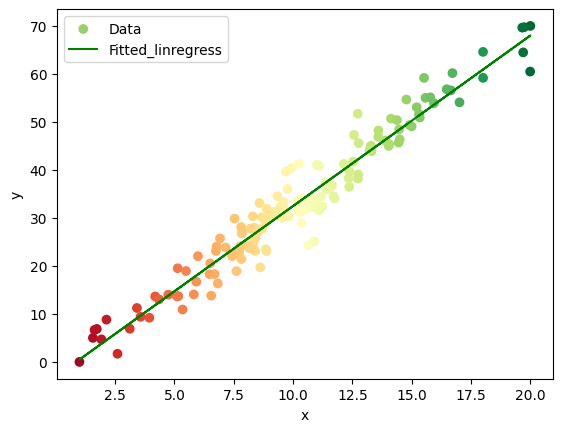

In [31]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_train_2 , y_train_2)

y_pred = intercept + slope * x
 

plt.scatter(x,y, c=x , cmap = 'RdYlGn', marker="o", label="Data")
plt.plot(x,y_pred, color="green", label="Fitted_linregress")
plt.legend(loc='best')
plt.xlabel('x') 
plt.ylabel('y')
plt.show()


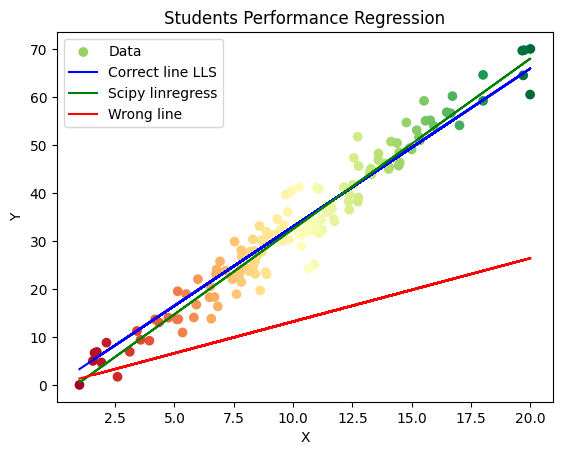

In [32]:
plt.title('Students Performance Regression')
plt.scatter(x,y, c=x , cmap = 'RdYlGn', marker="o", label="Data")
plt.plot(x_train , w * x_train , color="blue" , label="Correct line LLS")
plt.plot(x,y_pred, color="green", label="Scipy linregress")
plt.plot(x_train , wrong_w * x_train , color="red" , label="Wrong line")
plt.legend(loc='best')
plt.xlabel('X') 
plt.ylabel('Y')
plt.show()